In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# To display graphs in a notebook without the need to specially "call" them.

%matplotlib inline

In [5]:
path = r'C:\Users\iryna\Documents\11.08.2024 Boat Sales Analysis'

In [7]:
boats = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'boats6.2.csv'))

## Data preparation for regression analysis

#### Hypothesis: 
The higher the price of the boat, the less it receives views from customer

In [67]:
boats['value_in_eur'].value_counts(dropna=False)

value_in_eur
NaN          298
65000.0       80
45000.0       74
35000.0       69
89000.0       67
            ... 
1339000.0      1
1349000.0      1
1369000.0      1
1371535.0      1
3780.0         1
Name: count, Length: 2571, dtype: int64

In [69]:
# Filtering column 'value_in_eur' (selecting values without NaNs)
# As input X contains NaN - LinearRegression does not accept missing values encoded as NaN natively.

filtered_boats = boats[boats['value_in_eur'].notnull()]

In [71]:
# Checking output

filtered_boats['value_in_eur'].value_counts(dropna=False)

value_in_eur
65000.0      80
45000.0      74
35000.0      69
89000.0      67
75000.0      67
             ..
1339000.0     1
1349000.0     1
1369000.0     1
1371535.0     1
3780.0        1
Name: count, Length: 2570, dtype: int64

In [53]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = filtered_boats['value_in_eur'].values.reshape(-1,1)
y = filtered_boats['Number of views last 7 days'].values.reshape(-1,1)

In [55]:
X

array([[3337.],
       [3490.],
       [3770.],
       ...,
       [4499.],
       [4300.],
       [3780.]])

In [57]:
y

array([[226],
       [ 75],
       [124],
       ...,
       [354],
       [266],
       [194]], dtype=int64)

## Regression analysis


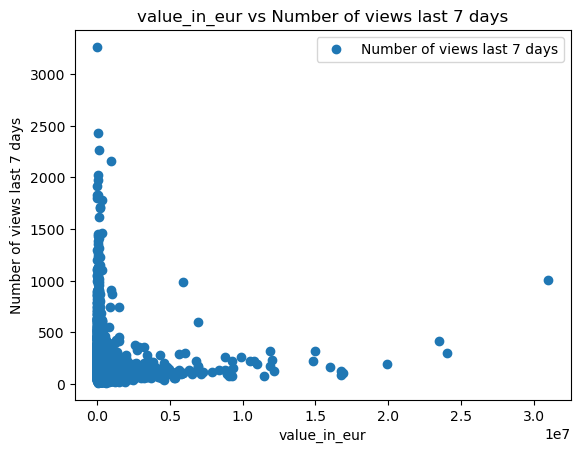

In [51]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

filtered_boats.plot(x = 'value_in_eur', y='Number of views last 7 days',style='o')
plt.title('value_in_eur vs Number of views last 7 days')  
plt.xlabel('value_in_eur')  
plt.ylabel('Number of views last 7 days')  
plt.show()

In [59]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [62]:
# Creating a regression object.

regression = LinearRegression() 

In [64]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

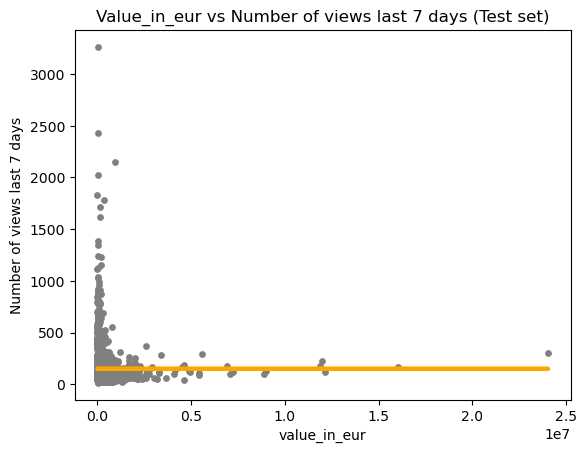

In [81]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Value_in_eur vs Number of views last 7 days (Test set)')
plot_test.xlabel('value_in_eur')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

#### The scatter plot shows that the slope of the regression line is almost absent. The influence of one variable on another is very small. There is almost no impact at all.

In [77]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [79]:
# Printing the model summary statistics and evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.80776837e-09]]
Mean squared error:  30092.55792622609
R2 score:  -0.00021332358774284188


##### The Slope coefficient is positive and indicates a positive relationship (as X rises, so does y), but 1.80776837e-09 = 0.00000000180776837 
##### and it can be equated to 0.And zero means that as X ('Value_in_eur') rises, y ('Number of views last 7 days') stays the same.

##### Mean squared error (MSE) has a sufficiently large number and shows that the regression line is far from the data points, indicating that the regression line isn’t an accurate representation of the data.

##### R2 score (r-squared value) is negative and means that the model fits worse than a horizontal line.

##### The model isn’t performing too well.

In [95]:
y_predicted

array([[150.09523002],
       [150.09890612],
       [150.09513844],
       ...,
       [150.09515319],
       [150.09518031],
       [150.09512879]])

In [97]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,71,150.095230
1,96,150.098906
2,192,150.095138
3,88,150.095459
4,72,150.095470
5,118,150.095173
6,78,150.096140
7,154,150.095415
8,91,150.095249
9,363,150.095193


##### We see a big difference between the actual values and predicted.
##### This model isn’t doing a great job of explaining the relationship between the “Value_in_eur" and "Number of views last 7 days” variables. The relationship doesn’t follow a single, straight regression line (isn’t purely linear).
##### The scatter diagram has a concentration of points along the x-axis and y-axis and could be contributing to the inaccuracy of the model

In [111]:
# Exporting dataframe

filtered_boats.to_csv(os.path.join(path, '02 Data','Prepared Data', 'filtered_boats_noNaNs_byvalue_6.4.csv'))